In [1]:
from random import shuffle

import tensorflow as tf
from keras.src.engine.training_generator_v1 import predict_generator
from matplotlib.testing.jpl_units import Epoch
from numpy.array_api import uint8
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

C:\Users\dogan\AppData\Local\Temp\ipykernel_22276\3443708542.py:6: UserWarning: The numpy.array_api submodule is still experimental. See NEP 47.
  from numpy.array_api import uint8


In [2]:
imageSize = 256
Batch_size =32
Epoch = 10

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(imageSize, imageSize),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

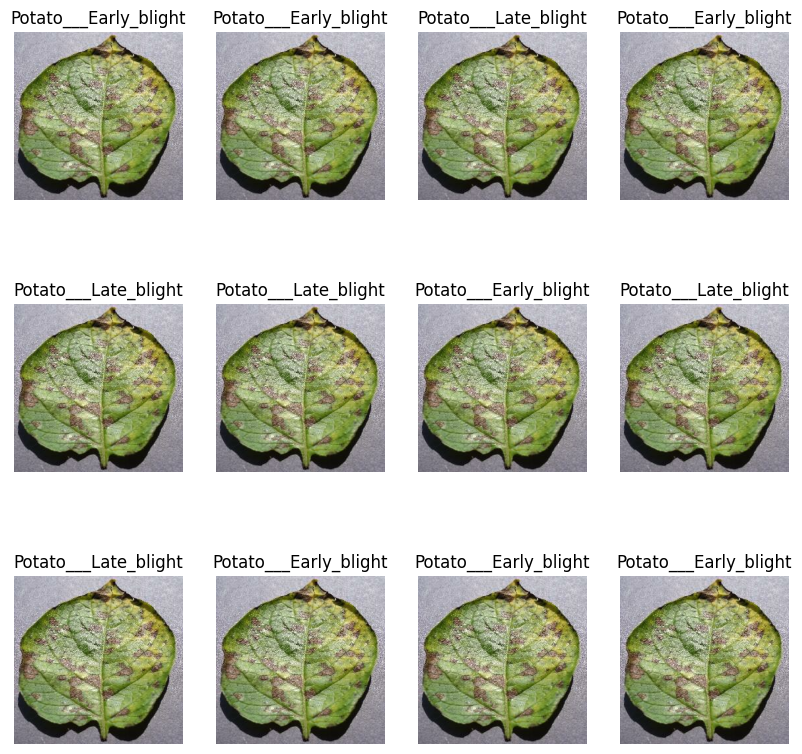

In [6]:
plt.figure(figsize=(10, 10))
for images_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images_batch[0].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


In [7]:
len(dataset)

68

In [8]:
train_size = 0.8
len(dataset)*train_size
train_dataset = dataset.take(54)

In [9]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [10]:
validation_dataset = test_dataset.take(6)
len(validation_dataset)

6

In [11]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [13]:
train_dataset , test_dataset , validation_dataset = get_dataset_partitions_tf(dataset)
len(train_dataset)

54

In [14]:
len(test_dataset)

6

In [15]:
len(validation_dataset)

8

In [16]:
train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
resizing_and_rescailing =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(imageSize , imageSize),
    layers.experimental.preprocessing.Rescaling(1./255)
    ])


In [18]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    ])

In [19]:
input_shape = (Batch_size,imageSize, imageSize, 3)

model  = models.Sequential([
    resizing_and_rescailing,
    data_agumentation,
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3) , padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])
model.build(input_shape = input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 128, 128, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 128, 128, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 64, 64, 64)          0         
 g2D)                                                 

In [21]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [22]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    batch_size=Batch_size,
    epochs=Epoch)

Epoch 1/10


54/54 [==============================] - 47s 791ms/step - loss: 0.9105 - accuracy: 0.4883 - val_loss: 0.8485 - val_accuracy: 0.4531
Epoch 2/10
54/54 [==============================] - 40s 725ms/step - loss: 0.7128 - accuracy: 0.6573 - val_loss: 0.5804 - val_accuracy: 0.7812
Epoch 3/10
54/54 [==============================] - 42s 755ms/step - loss: 0.4210 - accuracy: 0.8142 - val_loss: 0.2970 - val_accuracy: 0.8945
Epoch 4/10
54/54 [==============================] - 39s 702ms/step - loss: 0.2254 - accuracy: 0.9102 - val_loss: 0.2148 - val_accuracy: 0.9219
Epoch 5/10
54/54 [==============================] - 48s 884ms/step - loss: 0.1834 - accuracy: 0.9290 - val_loss: 0.1187 - val_accuracy: 0.9414
Epoch 6/10
54/54 [==============================] - 36s 655ms/step - loss: 0.1908 - accuracy: 0.9225 - val_loss: 0.2803 - val_accuracy: 0.9062
Epoch 7/10
54/54 [==============================] - 37s 663ms/step - loss: 0.1392 - accuracy: 0.9425 - val_loss: 0.1805 - val_accuracy: 0.93

In [23]:
socres = model.evaluate(test_dataset)

6/6 [==============================] - 2s 168ms/step - loss: 0.1509 - accuracy: 0.9531


In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

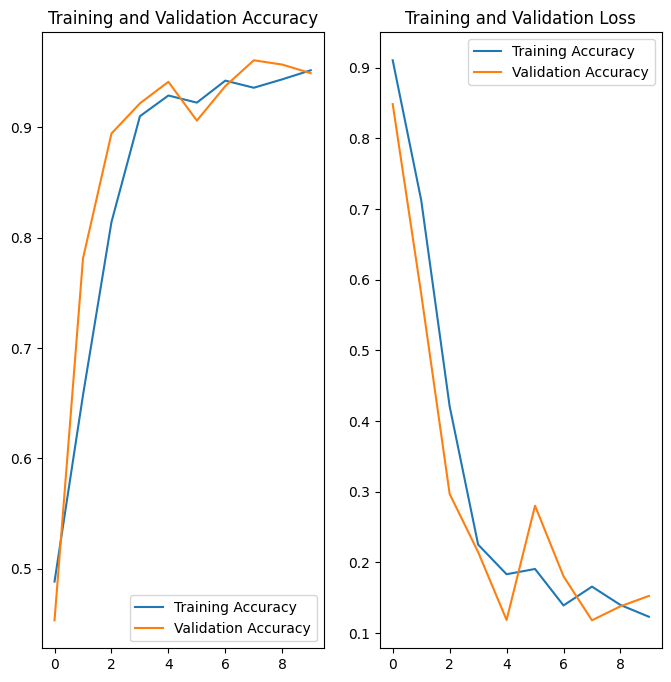

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2 ,1 )
plt.plot(range(Epoch) , acc  , label='Training Accuracy')
plt.plot(range(Epoch) , val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2 ,2 )
plt.plot(range(Epoch) , loss  , label='Training Accuracy')
plt.plot(range(Epoch) , val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
First label to predict :  Potato___healthy


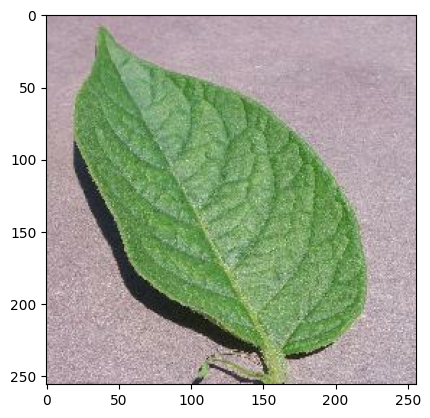

In [29]:

for images, labels in test_dataset.take(1):
    first_image = images[0].numpy().astype('uint8')
    first_label = labels[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("First label to predict : ", class_names[first_label])


In [34]:
def predict(model, image):

    if isinstance(image, tf.Tensor):
        img = tf.keras.preprocessing.image.img_to_array(image)
    else:
        img = np.array(image)
    img = np.expand_dims(img, axis=0)  # batch boyutu ekle
    predictions = model.predict(img)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * float(np.max(predictions[0])), 2)
    return predicted_class, confidence

predicted_class, confidence = predict(model, image)

NameError: name 'image' is not defined

1/1 [==============================] - 0s 25ms/step


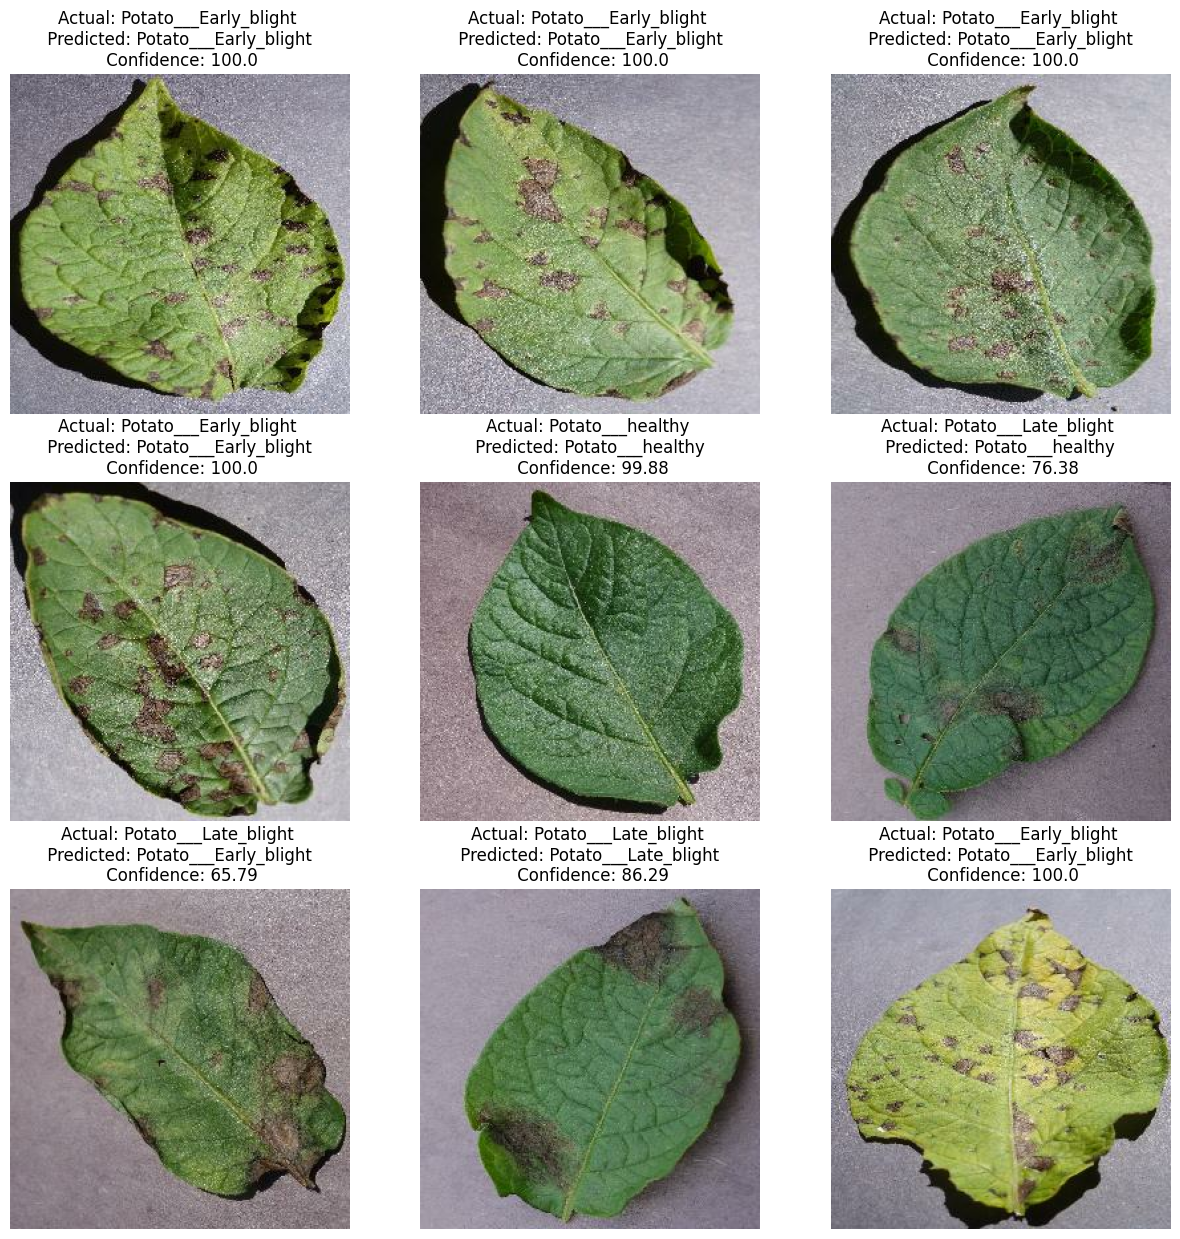

In [120]:
plt.figure(figsize=(15 ,15))
for image , labels  in test_dataset.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))


        predicted_class , confidence = predict(model, image[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}")
        plt.axis("off")

In [37]:

model.save("model.h5")
loaded = tf.keras.models.load_model("model.h5")

C:\Users\dogan\Patato_Model_Training\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
